In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

In [65]:
# Define the dataset with propellant age, storage temperature, and pass/fail status
dataset = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

# Extract features (age and temperature) and labels (pass/fail status)
features = dataset[:, :2]
labels = dataset[:, 2]

In [66]:
# Create a kNN classifier with k = 5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the dataset
knn.fit(features, labels)

KNeighborsClassifier()

In [67]:
# Initialize variables to find the plot boundaries
min_x = features[0][0]
min_y = features[0][1]
max_x = features[0][0]
max_y = features[0][1]

# Loop through the dataset to find the min and max values for age and temperature
for it in dataset:
    min_x = min(min_x, it[0])
    min_y = min(min_y, it[1])
    max_x = max(max_x, it[0])
    max_y = max(max_y, it[1])

# Adjust boundaries slightly for better visualization
min_x = min_x - 2
min_y = min_y - 2
max_x = max_x + 2
max_y = max_y + 2

# Calculate resolution for the mesh grid
resolution_x = (max_x - min_x) / 1920
resolution_y = (max_y - min_y) / 1080
# The values 1920 and 1080 are chosen to match a typical monitor resolution of 1920x1080 pixels.
# This ensures that if the graph is displayed full-screen on such a monitor, each pixel on the screen
# corresponds to a single point in the mesh grid, providing the most accurate and detailed visual representation.

In [68]:
# Generate a list of x and y values based on the resolution
values_x = []
values_y = []
for i in range(int((max_x - min_x) / resolution_x)):
    values_x.append(min_x + i * resolution_x)
for i in range(int((max_y - min_y) / resolution_y)):
    values_y.append(min_y + i * resolution_y)

# Create a mesh grid based on the x and y values
xx, yy = np.meshgrid(values_x, values_y)

# Predict the pass/fail status for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

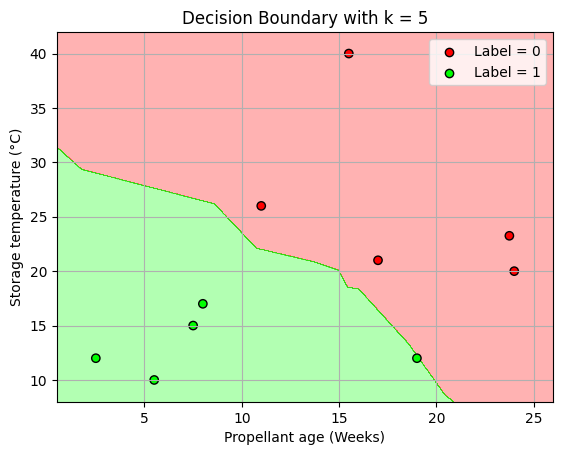

In [69]:
# Plot the decision boundary and data points
plt.figure()

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Create the contour plot with the custom colormap for decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

# Scatter plot with original colors for data points
#plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap=plt.cm.Paired)

# Create a custom legend
plt.scatter([], [], c=vibrant_red, edgecolor='k', label='Label = 0', marker='o')
plt.scatter([], [], c=vibrant_green, edgecolor='k', label='Label = 1', marker='o')

# Plot the scatter with the custom colormap
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap=cmap)

# Add legend
plt.legend()

# Labels and title
plt.xlabel('Propellant age (Weeks)')
plt.ylabel('Storage temperature (°C)')
plt.title(f'Decision Boundary with k = {k}')
plt.grid(True)

# Show the plot
plt.show()

In [70]:
# Perform Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
accuracy = []

In [71]:
# Loop through each LOOCV split
for train_index, test_index in loo.split(features):
    f_train, f_test = features[train_index], features[test_index]
    l_train, l_test = labels[train_index], labels[test_index]
    knn.fit(f_train, l_train)
    l_pred = knn.predict(f_test)
    accuracy.append(accuracy_score(l_test, l_pred))

# Calculate the average LOOCV accuracy
average_accuracy = np.mean(accuracy)
print(f'LOOCV Accuracy with k = {k}: {average_accuracy:.3f}')

LOOCV Accuracy with k = 5: 0.900


In [72]:
# Find the optimum k value by evaluating different k values
accuracies = []
k_values = range(1, 10)

# Loop through k values and calculate LOOCV accuracy for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = []
    for train_index, test_index in loo.split(features):
        f_train, f_test = features[train_index], features[test_index]
        l_train, l_test = labels[train_index], labels[test_index]
        knn.fit(f_train, l_train)
        l_pred = knn.predict(f_test)
        accuracy.append(accuracy_score(l_test, l_pred))
    accuracies.append(np.mean(accuracy))

# Determine the k with the highest LOOCV accuracy
# optimal_k = k_values[np.argmax(accuracies)]

# Determine all the k(s) with the highest LOOCV accuracy
max_accuracy = max(accuracies)
optimal_k = []
for i, k in enumerate(k_values):
    if accuracies[i] == max_accuracy:
        optimal_k.append(k)

print(f'Optimal values of k: {optimal_k}')

Optimal values of k: [1, 2, 4, 5, 6]


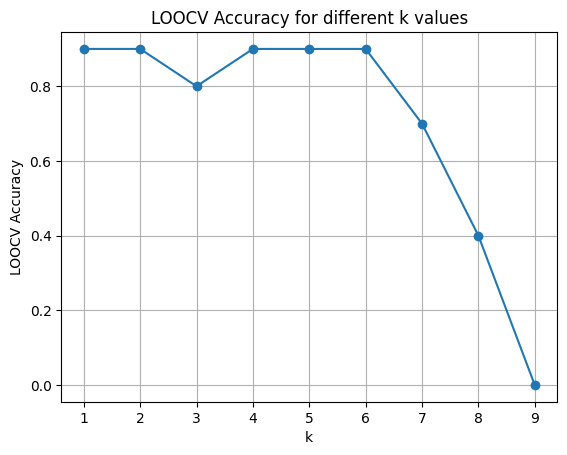

In [73]:
# Plot the LOOCV accuracy for different k values
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for different k values')
plt.grid(True)
plt.show()

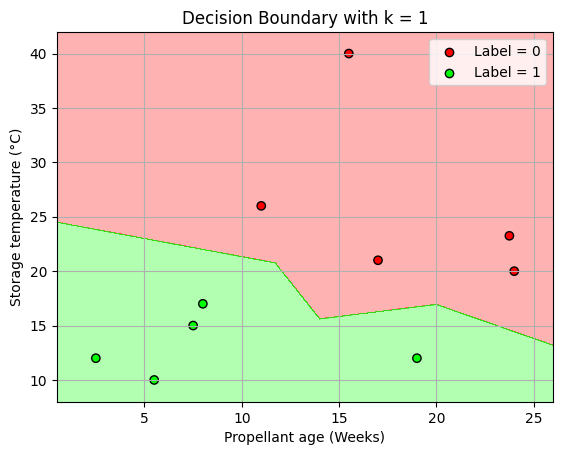

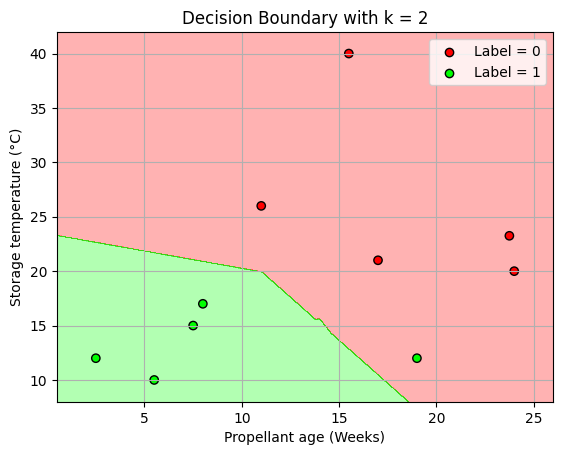

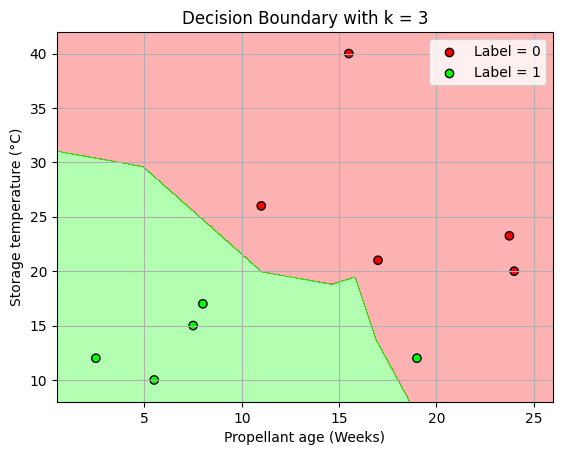

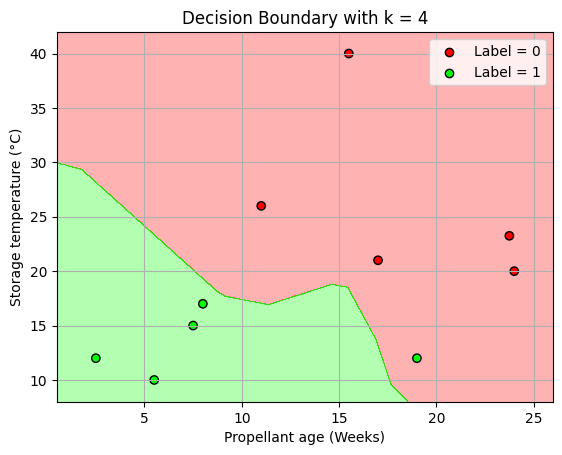

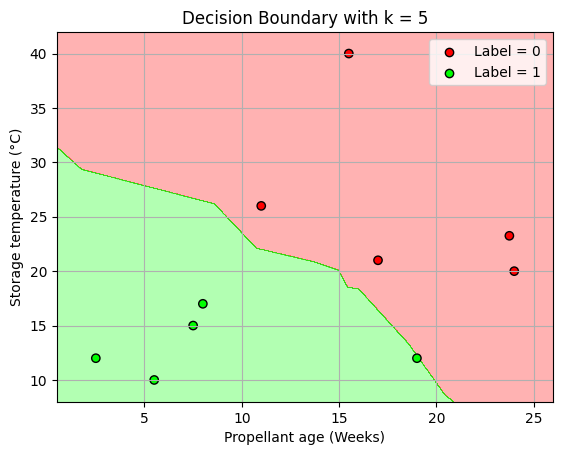

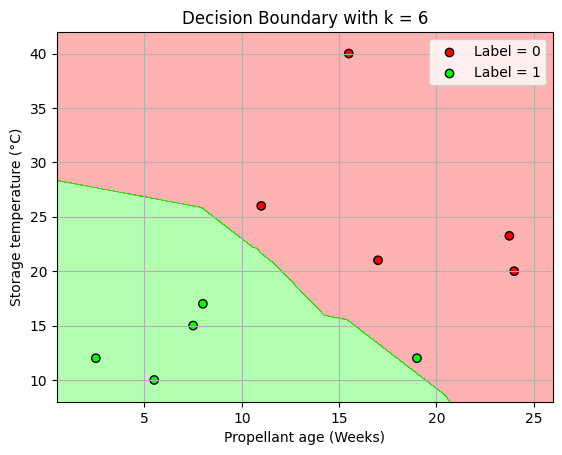

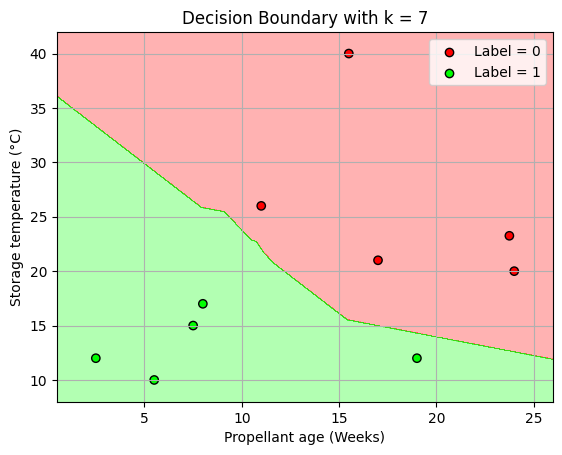

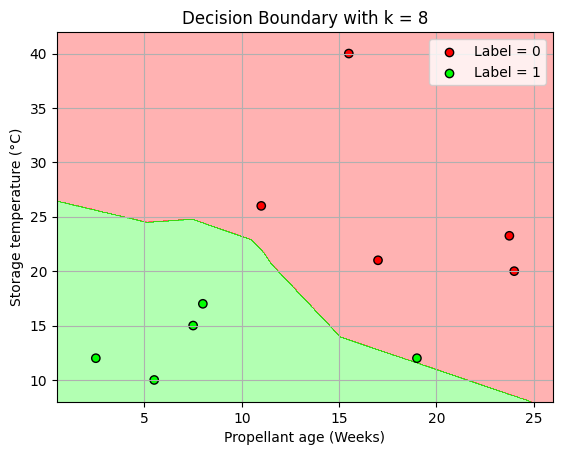

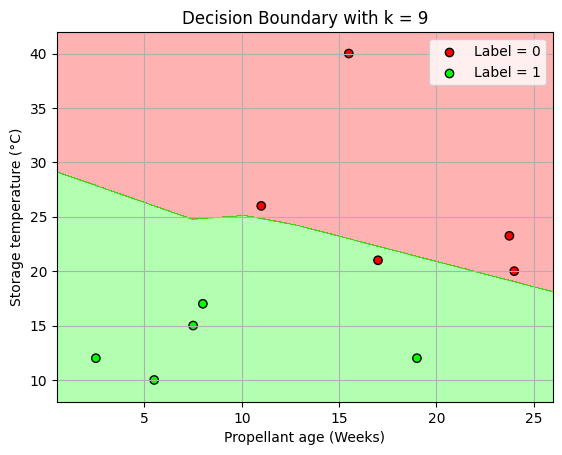

In [53]:
for i, k in enumerate(k_values):
    #if accuracies[i] == max_accuracy:
        # Create a kNN classifier with k
        knn = KNeighborsClassifier(n_neighbors=k)

        # Fit the model on the dataset
        knn.fit(features, labels)

        values_x = []
        values_y = []
        for i in range(int((max_x - min_x) / resolution_x)):
            values_x.append(min_x + i * resolution_x)
        for i in range(int((max_y - min_y) / resolution_y)):
            values_y.append(min_y + i * resolution_y)

        # Create a mesh grid based on the x and y values
        xx, yy = np.meshgrid(values_x, values_y)

        # Predict the pass/fail status for each point in the mesh grid
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot the decision boundary and data points
        plt.figure()

        # Define vibrant colors for decision regions
        vibrant_red = '#FF0000'  # Bright Red
        vibrant_green = '#00FF00'  # Bright Green

        # Create a colormap with vibrant colors
        cmap = ListedColormap([vibrant_red, vibrant_green])

        # Create the contour plot with the custom colormap for decision boundaries
        plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

        # Scatter plot with original colors for data points
        plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap=cmap)

        # Create a custom legend
        plt.scatter([], [], c=vibrant_red, edgecolor='k', label='Label = 0', marker='o')
        plt.scatter([], [], c=vibrant_green, edgecolor='k', label='Label = 1', marker='o')

        # Add legend
        plt.legend()

        # Labels and title
        plt.xlabel('Propellant age (Weeks)')
        plt.ylabel('Storage temperature (°C)')
        plt.title(f'Decision Boundary with k = {k}')
        plt.grid(True)

        # Show the plot
        plt.show()